In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook

In [2]:
# update the "User-Agent" for you header otherwise the sec will reject your
# requests and you will get a 403 error
headers = requests.utils.default_headers()
headers.update({"User-Agent": "First LastName email@email.com",})

In [3]:
url = r"https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=2022"
page = requests.get(url, headers = headers).text
df = pd.read_html(page)

In [4]:
df = df[0].dropna(axis=1)
df.set_index('Date', inplace=True)

# Animated Yield Curve Since The Begining Of The  Year

<IPython.core.display.Javascript object>


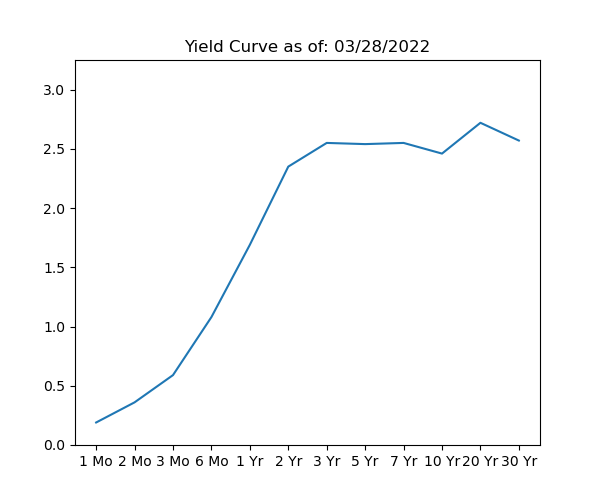

In [5]:
fig, ax = plt.subplots(figsize=(6,5))
ax.set_ylim([0,3.25])
p, = plt.plot(df.columns, df.iloc[0])

In [6]:
def animate(i):
    # set title to date
    ax.set_title('Yield Curve as of: ' + df.index[i])
    p.set_data(df.columns, df.iloc[i])
    return p

In [7]:
anim = FuncAnimation(fig, animate, frames=range(len(df.index)), interval=400, repeat_delay=1500, repeat=True)

In [8]:
plt.draw()
plt.show()

In [9]:
spread = pd.DataFrame()
spread['10 & 2 Yr'] = df['10 Yr'] - df['2 Yr']
spread['30 & 7 Yr'] = df['30 Yr'] - df['7 Yr']
spread['20 & 5 Yr'] = df['20 Yr'] - df['5 Yr']
spread['3 Yr & 2 Mo'] = df['3 Yr'] - df['2 Mo']

In [10]:
spread.tail()

,10 & 2 Yr,30 & 7 Yr,20 & 5 Yr,3 Yr & 2 Mo
Date,,,,
05/03/2022,0.19,0.00,0.20,2.18
05/04/2022,0.27,0.04,0.28,2.11
05/05/2022,0.34,0.08,0.34,2.20
05/06/2022,0.40,0.10,0.37,2.22
05/09/2022,0.44,0.15,0.43,2.08
